Домашнее задание по теме «Введение в машинное обучение. KNN. Метрики качества. Матрица ошибок. Виды данных (числовые/категориальные)»

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler # шкалирование данных, нормализация

from sklearn.metrics import mean_absolute_error, mean_squared_error

Загружаем данные

In [214]:
import pandas as pd 

test_df=pd.read_csv('dataset/test.csv')
train_df=pd.read_csv('dataset/train.csv')

## EDA

In [215]:
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [216]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [217]:
test_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [218]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [219]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
id,0.0
gravity,0.0
ph,0.0
osmo,0.0
cond,0.0
urea,0.0
calc,0.0
target,0.0


Нет пустых столбцов в таблице train

In [220]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
id,413.00,0.000
gravity,1.04,1.005
ph,7.94,4.760
osmo,1236.00,187.000
cond,38.00,5.100
urea,620.00,10.000
calc,14.34,0.170
target,1.00,0.000


In [221]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
id,206.500000
gravity,1.017894
ph,5.955459
osmo,651.545894
cond,21.437923
urea,278.657005
calc,4.114638
target,0.444444


In [222]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
id,206.500
gravity,1.018
ph,5.740
osmo,679.500
cond,22.200
urea,277.000
calc,3.130
target,0.000


In [223]:
#Находим дисперсию
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
id,14317.500000
gravity,0.000045
ph,0.412498
osmo,55073.091109
cond,56.471464
urea,18616.487396
calc,10.353210
target,0.247511


In [224]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
id,41.300,371.700
gravity,1.008,1.025
ph,5.330,6.810
osmo,343.600,925.200
cond,10.900,29.000
urea,95.000,443.000
calc,1.053,8.515
target,0.000,1.000


In [225]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
id,103.250,309.750
gravity,1.012,1.022
ph,5.530,6.280
osmo,455.250,840.000
cond,15.500,27.600
urea,170.000,385.000
calc,1.450,6.630
target,0.000,1.000


# 3
Столбец “target” принимает значения 0 (нет камней в почках) или 1 (есть камни в почках) и является целевой переменной.Дл целевой переменной target посчитайте долю 1.

In [226]:
print(f"Доля значения 1 для целевой переменной target: {(train_df.target.values == 1).mean()}")

Доля значения 1 для целевой переменной target: 0.4444444444444444


# 4
Постройте минимум 2 информативных графика, которые будут полезны для анализа

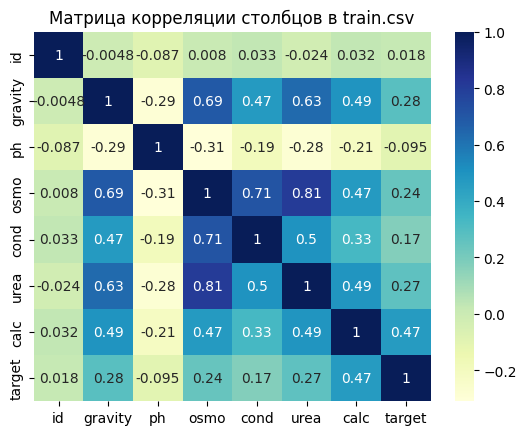

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Матрица корреляции столбцов в train.csv")
plt.show()

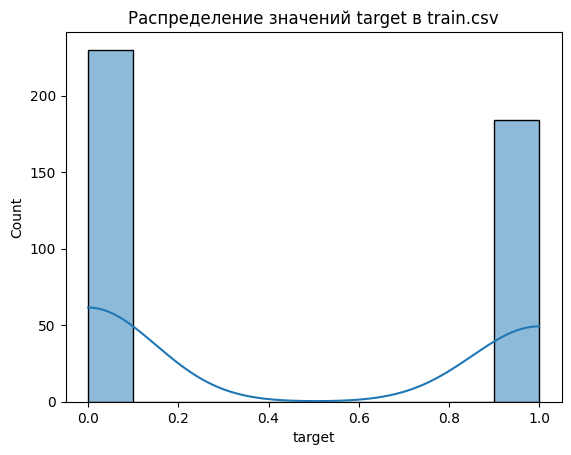

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_df['target'], kde=True)
plt.title("Распределение значений target в train.csv")
plt.show()

# 5
Обучите алгоритм KNN (k-ближайших соседей), посчитайте качество классификации и напишите ответы на следующие вопросы: 

    a)Чему равен гиперпараметр k? Почему вы выбрали именно такой k? 

    b) Насколько ваш алгоритм верно предсказывает целевую переменную?

Стандартизация датасета

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df.drop('target', axis=1))
scaled_features = scaler.transform(train_df.drop('target', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = train_df.drop('target', axis=1).columns)

Разделение датасета на обучающие и тестовые данные

In [231]:
x = scaled_data
y = train_df['target']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    stratify=train_df["target"],
                                                    test_size=0.2, random_state=42)

In [233]:
X_train.shape,  X_test.shape

((331, 7), (83, 7))

In [234]:
y_train.mean(), y_test.mean()

(np.float64(0.44410876132930516), np.float64(0.4457831325301205))

## Поиск оптимального k

In [235]:
# для примера берем рандомное число
n_neighbors = 11
neigh = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print(f"Точность модели при k={n_neighbors}: ", accuracy_score(y_test, Pred_y))

Точность модели при k=11:  0.7349397590361446


Подбираем k

In [236]:
acc = []
from sklearn import metrics
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    acc.append(score)

print("Максимальная точность : ",max(acc),"достигается при K =",acc.index(max(acc)) + 1)

optimal_k = acc.index(max(acc)) + 1

Максимальная точность :  0.7831325301204819 достигается при K = 5


Мы ищем наиболее точную модель.
Поэтому выбирается k = 5

In [237]:
model_cl = KNeighborsClassifier(n_neighbors = optimal_k)
model_cl.fit(X_train, y_train) # тренировка модели fit

KNeighborsClassifier()

Не показывает число 5 так, как это и есть значение по умолчанию

## Оценка точности алгоритма

Оцениваем качество классификации

In [238]:
y_train_pred = model_cl.predict(X_train) # предсказание на обучающей выборке
y_test_pred = model_cl.predict(X_test) # проверка на тестовой выборке

In [239]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Вычисление метрик
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

In [240]:
#Точность предсказания на основе обучающей и тестовой выборках 
print("Точность предсказания на основе обучающей выборки: ", accuracy_train)
print("Точность предсказания на основе тестовой выборки: ", accuracy_test)

Точность предсказания на основе обучающей выборки:  0.7854984894259819
Точность предсказания на основе тестовой выборки:  0.7831325301204819


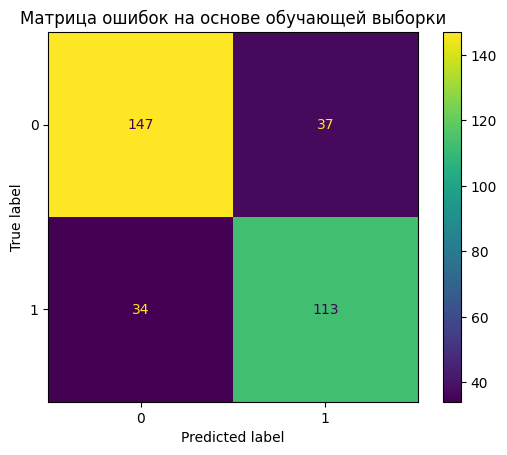

In [250]:
from sklearn.metrics import ConfusionMatrixDisplay
#Матрица ошибок на основе обучающей и тестовой выборках 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=model_cl.classes_)
disp.plot()
plt.title("Матрица ошибок на основе обучающей выборки")
plt.show()

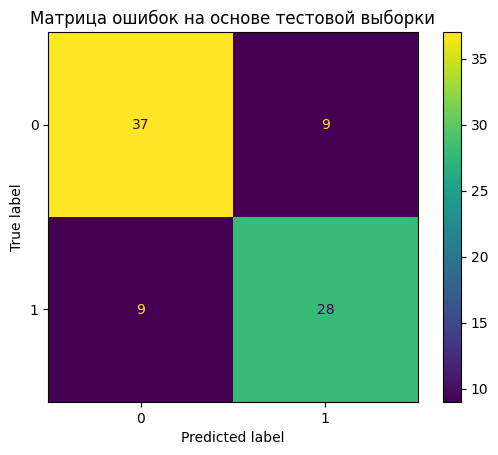

In [251]:
from sklearn.metrics import ConfusionMatrixDisplay
#Матрица ошибок на основе обучающей и тестовой выборках 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=model_cl.classes_)
disp.plot()
plt.title("Матрица ошибок на основе тестовой выборки")
plt.show()

In [253]:
#Классификационный отчет
print("Классификационный отчет")
print("Обучающая выборка:",class_report_train, "Тестовая выборка:" ,class_report_test, sep= '\n')

Классификационный отчет
Обучающая выборка:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       184
           1       0.75      0.77      0.76       147

    accuracy                           0.79       331
   macro avg       0.78      0.78      0.78       331
weighted avg       0.79      0.79      0.79       331

Тестовая выборка:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.76      0.76      0.76        37

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83



In [244]:
from sklearn.metrics import mean_squared_error
#Среднеквадратичная ошибка
print("Среднеквадратичная ошибка MSE")
print("Обучающая выборка:", mean_squared_error(y_train, y_train_pred), "Тестовая выборка:", mean_squared_error(y_test, y_test_pred), sep='\n')

Среднеквадратичная ошибка MSE
Обучающая выборка:
0.21450151057401812
Тестовая выборка:
0.21686746987951808


In [252]:
from sklearn.metrics import mean_absolute_error
#Среднее абсолютное отклонение
print("Среднее абсолютное отклонение MAE")
print("Обучающая выборка:",mean_absolute_error(y_train, y_train_pred), "Тестовая выборка:", mean_absolute_error(y_test, y_test_pred), sep='\n')

Среднее абсолютное отклонение MAE
Обучающая выборка:
0.21450151057401812
Тестовая выборка:
0.21686746987951808


In [246]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC (площадь под кривой ROC):", roc_auc) # Площадь под кривой, чем больше, тем больше производительность модели


ROC AUC (площадь под кривой ROC): 0.7805522914218567


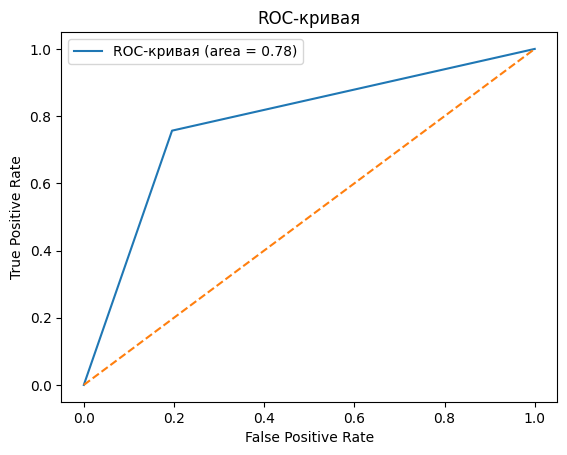

In [247]:
#Оценивает качество бинарной классификации

plt.plot(fpr,tpr, label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

Модель в большинстве случаев правильно предсказывает целевую переменную. Качество модели в общем приемлимое. 

Для улучшения нужно увеличить количество обучающих и тестовых данных.